In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [3]:
df = pd.read_pickle("../data/reviews_vector_ngrams.pkl")

In [4]:
X=df[df.columns[4:]]
y=df["binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# function which downsamples the majority class in a dataframe
def downsample_binary(y_train_in, X_train_in, min = 0, maj=1):
    # combine x and y
    data = pd.concat([y_train_in, X_train_in], axis=1)
    target_name = data.columns[0]
    
    # count the instances of the minority class
    minority_count = data[data[target_name] == min].shape[0]
    
    # random sample from the majority class
    majority_sample = data[data[target_name] == maj].sample(n=minority_count, random_state=42)
    
    # merge together
    balanced_df = pd.concat([data[data[target_name] == min], majority_sample])
    
    # Shuffle
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return balanced_df

balanced_set = downsample_binary(y_train, X_train)

In [6]:
# balanced data training split
X_train_bal = balanced_set.drop("binary", axis=1)
y_train_bal = balanced_set["binary"]


In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [8]:
scaler_bal = StandardScaler()
scaler_bal.fit(X_train_bal)
X_train_transformed_bal = scaler.transform(X_train_bal)
X_test_transformed_bal = scaler.transform(X_test)

In [9]:

random_forest_model = RandomForestClassifier(n_estimators=30, random_state=42) 
random_forest_model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [10]:
y_train_predicted = random_forest_model.predict(X_train_transformed)
y_test_predicted = random_forest_model.predict(X_test_transformed)
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.75      0.57      0.65     34325
           1       0.88      0.94      0.91    109233

    accuracy                           0.85    143558
   macro avg       0.81      0.76      0.78    143558
weighted avg       0.84      0.85      0.84    143558



In [11]:

random_forest_model_bal = RandomForestClassifier(n_estimators=30, random_state=42) 
random_forest_model_bal.fit(X_train_transformed_bal, y_train_bal)

RandomForestClassifier(n_estimators=30, random_state=42)

In [13]:
y_train_predicted_bal = random_forest_model_bal.predict(X_train_transformed_bal)
y_test_predicted_bal = random_forest_model_bal.predict(X_test_transformed_bal)
print(classification_report(y_test, y_test_predicted_bal))

              precision    recall  f1-score   support

           0       0.55      0.82      0.66     34325
           1       0.93      0.78      0.85    109233

    accuracy                           0.79    143558
   macro avg       0.74      0.80      0.75    143558
weighted avg       0.84      0.79      0.81    143558



In [1]:
estimators = [('normalise', StandardScaler()),
              ('model', RandomForestClassifier(n_estimators=30, random_state=12))]
pipe = Pipeline(estimators)


NameError: name 'StandardScaler' is not defined

In [17]:

params = {'normalise': [StandardScaler()],
    'model__criterion': ["entropy"],
    'model__n_estimators': [30,60,100],
    'model__random_state':[12]
    # 'model__max_depth': [5,10,15],
    # 'model__min_samples_leaf': [3,5]
    # # 'model__min_samples_split':[5,10],

    
    
}

grid_search = GridSearchCV(pipe, param_grid=params, verbose=3, n_jobs=2)

In [18]:
fitted_forest = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 2/5] END model__criterion=entropy, model__n_estimators=30, normalise=StandardScaler();, score=0.852 total time= 1.8min
[CV 1/5] END model__criterion=entropy, model__n_estimators=30, normalise=StandardScaler();, score=0.852 total time= 1.9min
[CV 4/5] END model__criterion=entropy, model__n_estimators=30, normalise=StandardScaler();, score=0.850 total time= 1.8min
[CV 3/5] END model__criterion=entropy, model__n_estimators=30, normalise=StandardScaler();, score=0.851 total time= 1.8min
[CV 5/5] END model__criterion=entropy, model__n_estimators=30, normalise=StandardScaler();, score=0.852 total time= 1.8min
[CV 1/5] END model__criterion=entropy, model__n_estimators=60, normalise=StandardScaler();, score=0.854 total time= 3.5min
[CV 2/5] END model__criterion=entropy, model__n_estimators=60, normalise=StandardScaler();, score=0.854 total time= 3.5min
[CV 3/5] END model__criterion=entropy, model__n_estimators=60, normalise=Standa

/Users/edo/anaconda3/envs/es_capstone/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/5] END model__criterion=entropy, model__n_estimators=100, normalise=StandardScaler();, score=0.855 total time= 5.7min


KeyboardInterrupt: 

In [14]:
y_train_predicted = random_forest_model.predict(X_train_transformed)
y_test_predicted = random_forest_model.predict(X_test_transformed)
train_acc_unbal = accuracy_score(y_train, y_train_predicted)
test_acc_unbal= accuracy_score(y_test, y_test_predicted)
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.75      0.57      0.65     34325
           1       0.88      0.94      0.91    109233

    accuracy                           0.85    143558
   macro avg       0.81      0.76      0.78    143558
weighted avg       0.84      0.85      0.84    143558



In [24]:

random_forest_model_bal = RandomForestClassifier(n_estimators=20, random_state=42) # setting max features is not needed here as our dataset only has 2 features.
random_forest_model_bal.fit(X_train_transformed_bal, y_train_bal)

RandomForestClassifier(n_estimators=20, random_state=42)

In [25]:
# unbalanced classes - good accuracy - but what about other metrics?
random_forest_model.score(X_train_transformed, y_train), random_forest_model.score(X_test_transformed, y_test)

(0.9768219497301205, 0.8699414337774932)

In [26]:
# downsampled majority class - great accuracy - but what about other metrics?
random_forest_model_bal.score(X_train_transformed_bal, y_train_bal), random_forest_model.score(X_test_transformed_bal, y_test_bal)

(0.9601853192413493, 0.9157452424883167)

In [27]:
y_test_pred = random_forest_model.predict(X_test_transformed) 

In [28]:
y_test_pred_bal = random_forest_model_bal.predict(X_test_transformed_bal) 

In [45]:
accuracy_score(y_test_bal,y_test_pred_bal)

0.8136052039703169

In [29]:
y_pred_total_bal = random_forest_model_bal.predict(scaler_bal.transform(X_bal))

In [30]:
accuracy_score(y_bal, y_pred_total_bal)

0.8928813851507871

In [31]:
precision_score(y_bal, y_pred_total_bal)

0.8692607594936709

In [32]:
recall_score(y_bal, y_pred_total_bal)

0.9248650512320472

In [33]:
cm = confusion_matrix(y_test, y_test_pred)
cm_norm = confusion_matrix(y_test, y_test_pred, normalize="true")

In [34]:
cm_bal = confusion_matrix(y_test_bal, y_test_pred_bal)
cm_norm_bal = confusion_matrix(y_test_bal, y_test_pred_bal, normalize="true")

In [35]:
cm_full_bal = confusion_matrix(y_bal, y_pred_total_bal)
cm_full_bal_norm = confusion_matrix(y_bal, y_pred_total_bal, normalize="true")

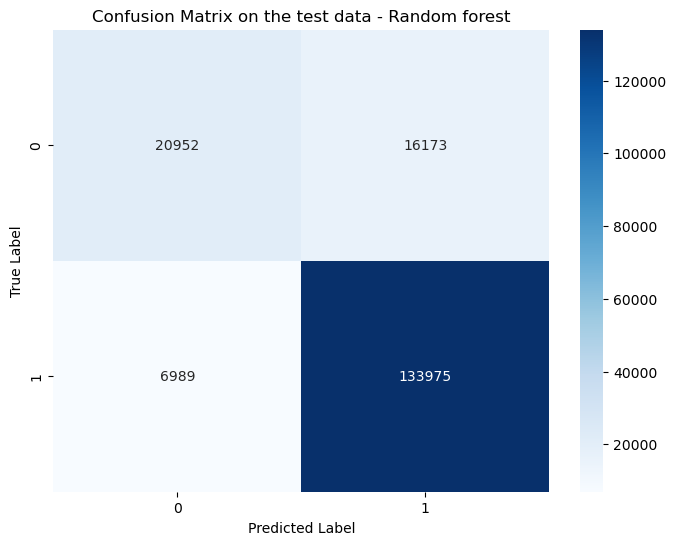

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Random forest")
plt.show()

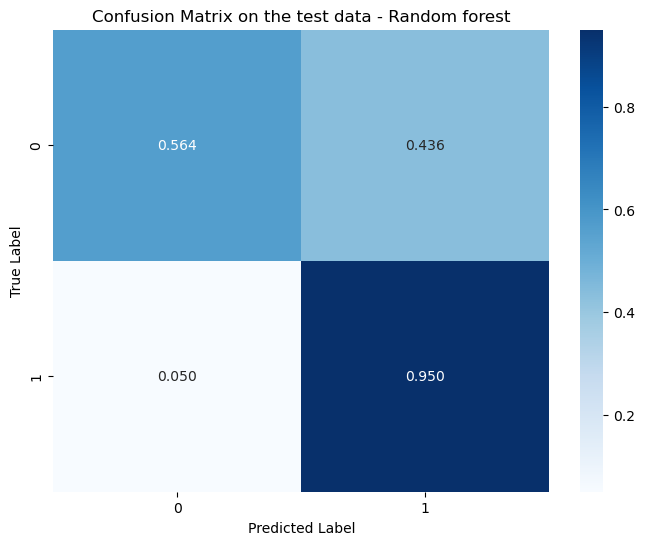

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt=".3f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Random forest")
plt.show()

In [38]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64     37125
           1       0.89      0.95      0.92    140964

    accuracy                           0.87    178089
   macro avg       0.82      0.76      0.78    178089
weighted avg       0.86      0.87      0.86    178089



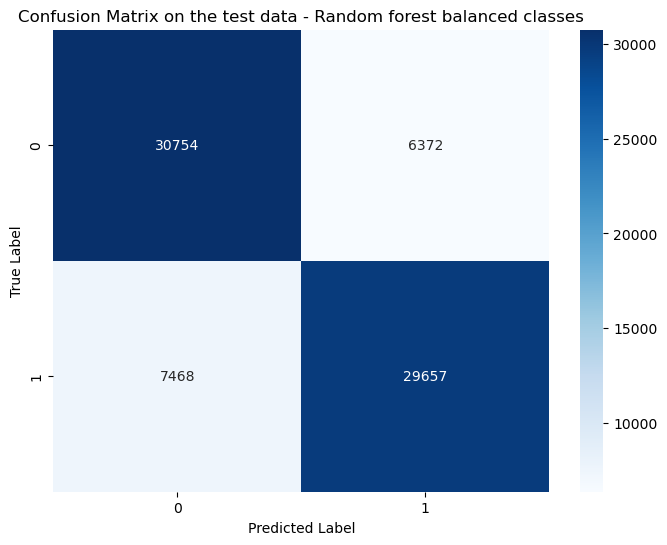

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Random forest balanced classes")
plt.show()

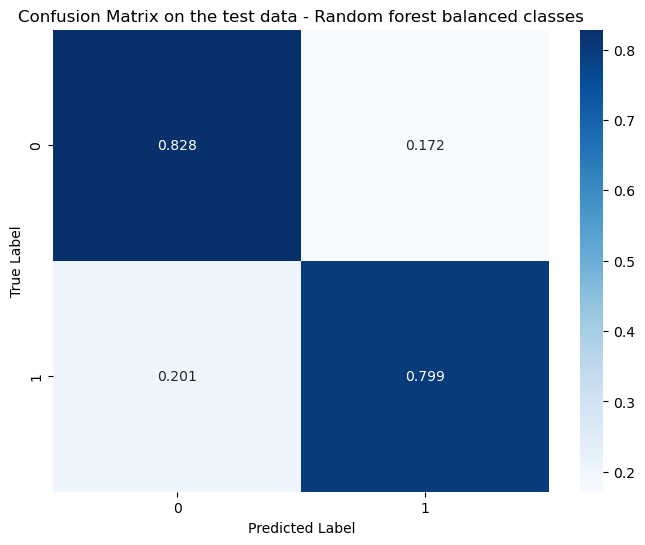

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm_bal, annot=True, fmt=".3f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Random forest balanced classes")
plt.show()

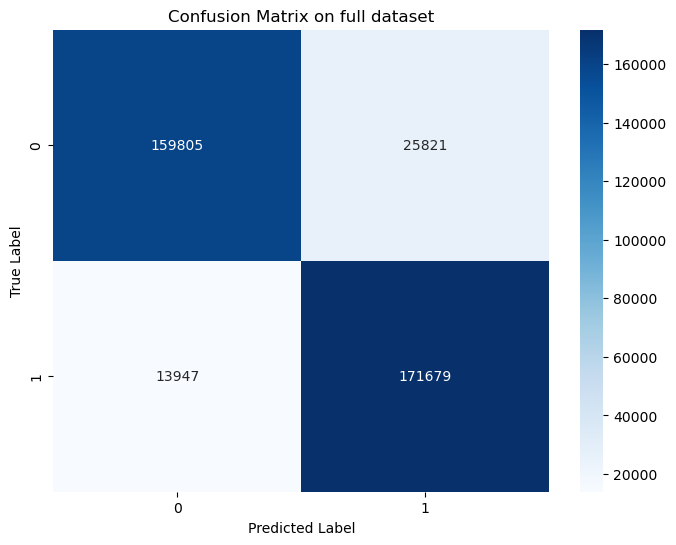

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_full_bal, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on full dataset")
plt.show()

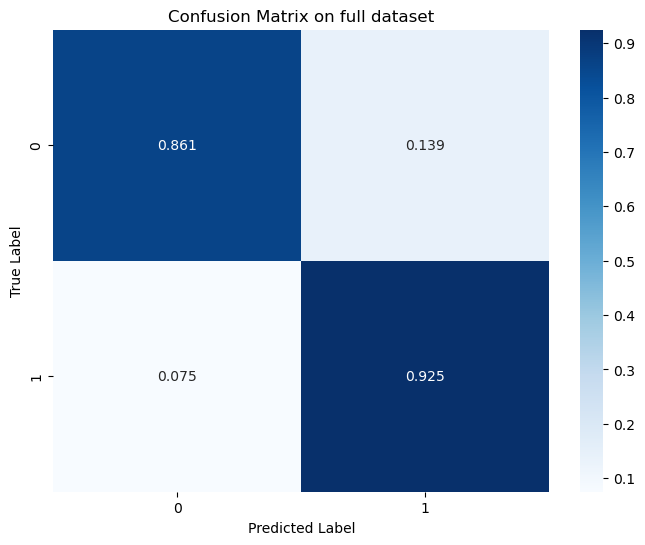

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_full_bal_norm, annot=True, fmt=".3f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on full dataset")
plt.show()

In [43]:
print(classification_report(y_bal, y_pred_total_bal))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89    185626
           1       0.87      0.92      0.90    185626

    accuracy                           0.89    371252
   macro avg       0.89      0.89      0.89    371252
weighted avg       0.89      0.89      0.89    371252



In [44]:


# fitting AdaBoost model with 20 estimators
abc_2 = AdaBoostClassifier(n_estimators=20)
abc_2.fit(X_train_transformed_bal, y_train_bal)

# evaluate
y_pred_ada = abc_2.predict(X_test_transformed_bal)
print(classification_report(y_test_bal, y_pred_ada))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76     37126
           1       0.79      0.67      0.73     37125

    accuracy                           0.75     74251
   macro avg       0.75      0.75      0.74     74251
weighted avg       0.75      0.75      0.74     74251

